# Testing for Continued Racial Disparities in Berkeley Police Stops

### Overview

In 2018, the Center for Police Equity [released a report](https://www.berkeleyside.org/wp-content/uploads/2018/05/Berkeley-Report-May-2018.pdf) on the Berkeley Police Department saying that there were racial disparities in arrest rates between white and BIPOC subjects. Their study found that people of color were 4.5x-6.5x more likely to be stopped than white citizens, 4.5x-20x more likely to be searched per capita, and 2x as likely to be arrested overall. The report caused major discussion of polcing in the city of Berkeley, and one of the organizations requests was that the city collect more race specific data in their reports moving forward, particularly surrounding the *perceived* race of the subject and if their race had been perceived prior to the stop. 


Since the time of this report, the city has begun collecting [RIPA-compliant](https://ripalog.com/ripa/ripa-faq.htm#:~:text=RIPA%20stop%20data%3F-,What%20is%20RIPA%3F,regarding%20pedestrian%20and%20traffic%20stops%E2%80%9D.) stops data (September 2020 - Present) and very recently (Latest as of May 2022) approved a batch of [departmental and municipal changes](https://www.berkeleyside.org/2022/05/06/berkeley-city-council-approves-police-reimagining-package) that will radically alter how traffic stops are handled in the city of Berkeley. There is a unique opportunity here to conduct a more pointed analysis of stops and race, both in comparison to the broader non-RIPA stops data of the past, and before/in preparation for the very different data that will follow re-organization of Berkeley transportation laws and their enforcement. We will look to see if those specific racial disparities actually do exist with the better data, and set up opportunities for clear comparisons as future policies change. 

The direct questions of this analysis are: 
- Are Black, Hispanic, or BIPOC subjects more likely to be arrested than White Subjects when stopped? 
- Do local factors like neighborhood median income or residential racial composition affect likelihood of an arrest? 
- And do both the RIPA and Non-RIPA data reveal racial disparities? 

### Data

The stops data used in this project was collected by the city of Berkeley Police Department from 2015-2022 and downloaded in March of 2022 from its publicly available open access data portal. The data comes in two formats: [RIPA](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Stop-Data-October-1-2020-Present-/ysvs-bcge) and [Non-RIPA](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Stop-Data-Jan-26-2015-to-Sep-30-2020-/4tbf-3yt8) Compliant data. All data since October of 2020 is RIPA-Compliant and as a result provides increased insights. Non-RIPA Compliant data has been kept to attempt to comprehensively represent the city, but some variables have been changed to match with new RIPA terminology, and certain models may vary in observation size due to lacking shared features between the two datasets. This is unfortunate, but some key assumptions can still be tested regardless of the differences in data. 

Combined, there are approximately 64k features, and 8 shared features. For the Smaller dataset (RIPA-compliant only) there are approximately 8k observations and 45 features. 

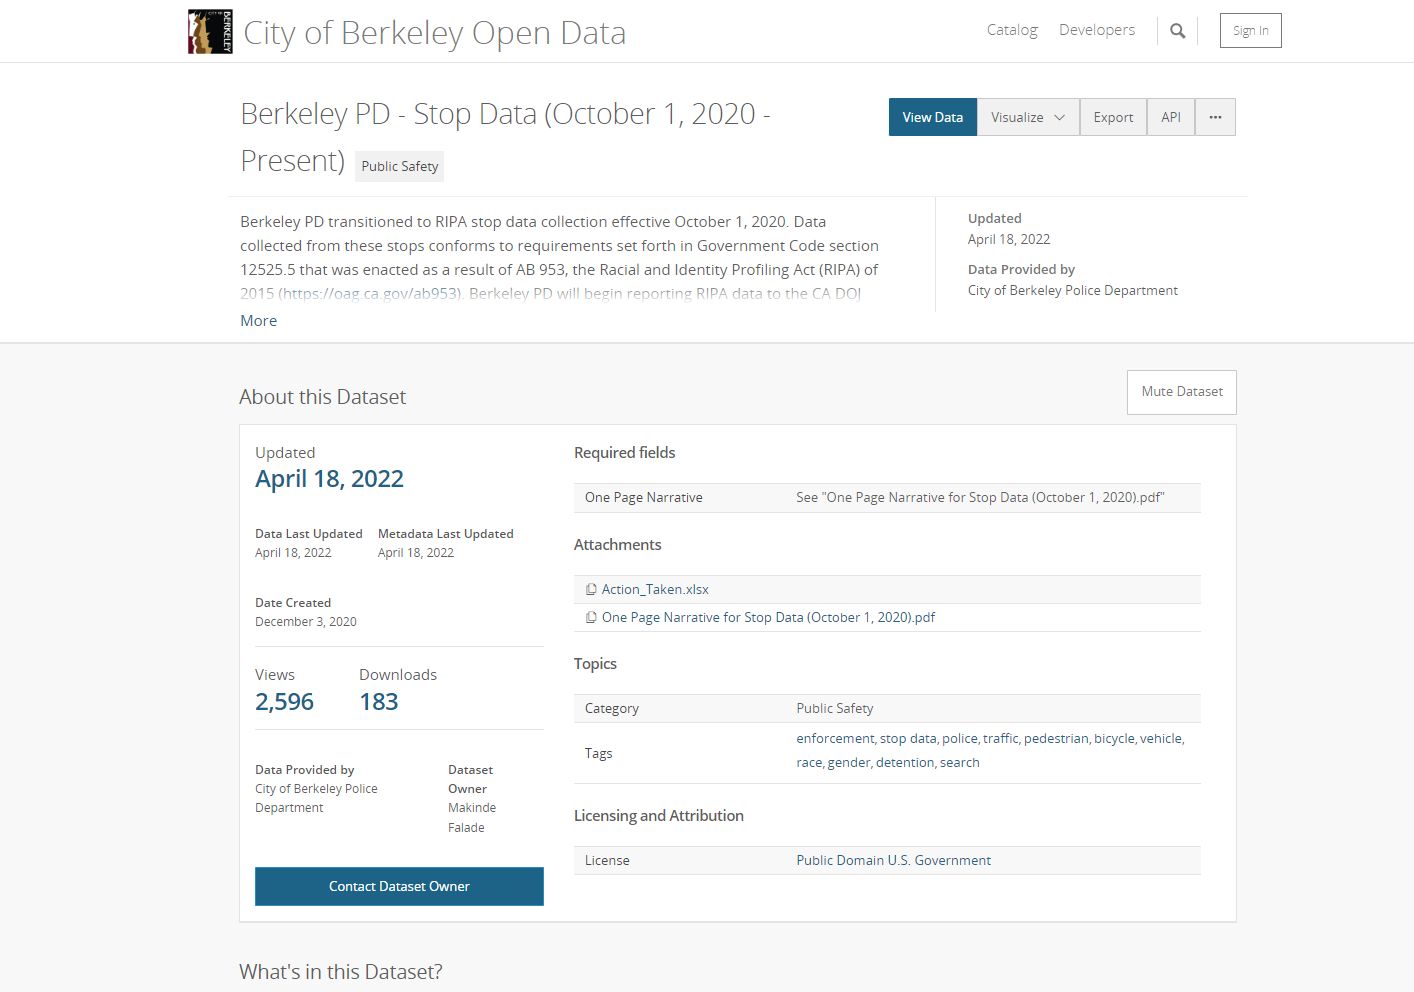

Long-term crime and arrest data is also not directly available through the city and will be left out of this analysis. While it is still beneficial to look at stops to analyze police activity, it’s important to clarify the difference between stops and arrests, and admit that while comprehensive, the presently available stops data do not paint the whole picture. Inferences made in previous reports surrounding the likelihood of being stopped cannot be directly equated to the likelihoods of being arrested post-stop, even if post-stop data can still reveal racial disparities. 

Overall features included: 

       learecordid, incidentnumber, dateofstop,
       timeofstop, durationofstop, city, lat, long,
       raceperceivedpriortostop, perceivedraceorethnicity,
       perceivedgender, perceivedage, reasonforstop,
       reasonforstopnarrative, resultofstop, personnumber,
       isstopmadeinresponsetocallforservice, informationbasedstop,
       typeofstop, officertypeofassignment, location,
       islocationak12publicschool, ifk12schoolisstopofastudent,
       schoolname, educationcodesection, educationcodesubdivision,
       perceivedgendernonconforming, islgbt,
       personhadlimitedornoenglishfluency, perceivedorknowndisability,
       cityofresidence, trafficviolationtype,
       trafficviolationoffensecodes, suspicionoffensecode,
       suspicionsubtype, actionstaken, basisforsearch,
       basisforsearchnarrative, basisforpropertyseizure,
       typeofpropertyseized, contrabandorevidence, othercontrabanddesc,
       warningoffensecodes, citationoffensecodes,
       infieldciteandreleaseoffensecodes, custodialarrestoffensecodes

And added census features included: 
       
       censustract,
       tract_medianincome, tract_totalpop, tract_whitepop,
       tract_nonwhitecomp, tract_poccomp, tract_nonwhitepop,
       tract_pocpop, tract_aapop, tract_na_aipop, tract_aisianpop,
       tract_hawaiian, tract_mixed2, tract_totalnumstops,
       tract_annualstops, tract_distancefromcal

For variables like local [median income](https://data.census.gov/cedsci/table?t=Income%20%28Households,%20Families,%20Individuals%29&g=1400000US060014,06001421100,06001421200,06001421300,06001421400,06001421500,06001421600,06001421700,06001421800,06001421900,06001422000,06001422100,06001422200,06001422300,06001422400,06001422500,06001422600,06001422700,06001422800,06001422900,06001422901,06001422902,06001423000,06001423100,06001423200,06001423300,06001423400,06001423500,06001423601,06001423602,06001423700,06001423800,06001423901,06001423902,06001424001&tid=ACSST5Y2020.S1903) or [residential racial composition](https://data.census.gov/cedsci/table?t=Race%20and%20Ethnicity&g=1400000US060014,06001421100,06001421200,06001421300,06001421400,06001421500,06001421600,06001421700,06001421800,06001421900,06001422000,06001422100,06001422200,06001422300,06001422400,06001422500,06001422600,06001422700,06001422800,06001422900,06001422901,06001422902,06001423000,06001423100,06001423200,06001423300,06001423400,06001423500,06001423601,06001423602,06001423700,06001423800,06001423901,06001423902,06001424001&tid=ACSDT5Y2020.B02001), data was pulled from the 2020 US Census on the census website and then joined into the dataset by census tract. A [census map of the city of Berkeley](https://data.cityofberkeley.info/Demographics/Census-Tract-Polygons-2010/peq3-2arw) was available on the city's website in multiple formats, and all maps created in this project were modified versions of the .geoJSON files available there. 

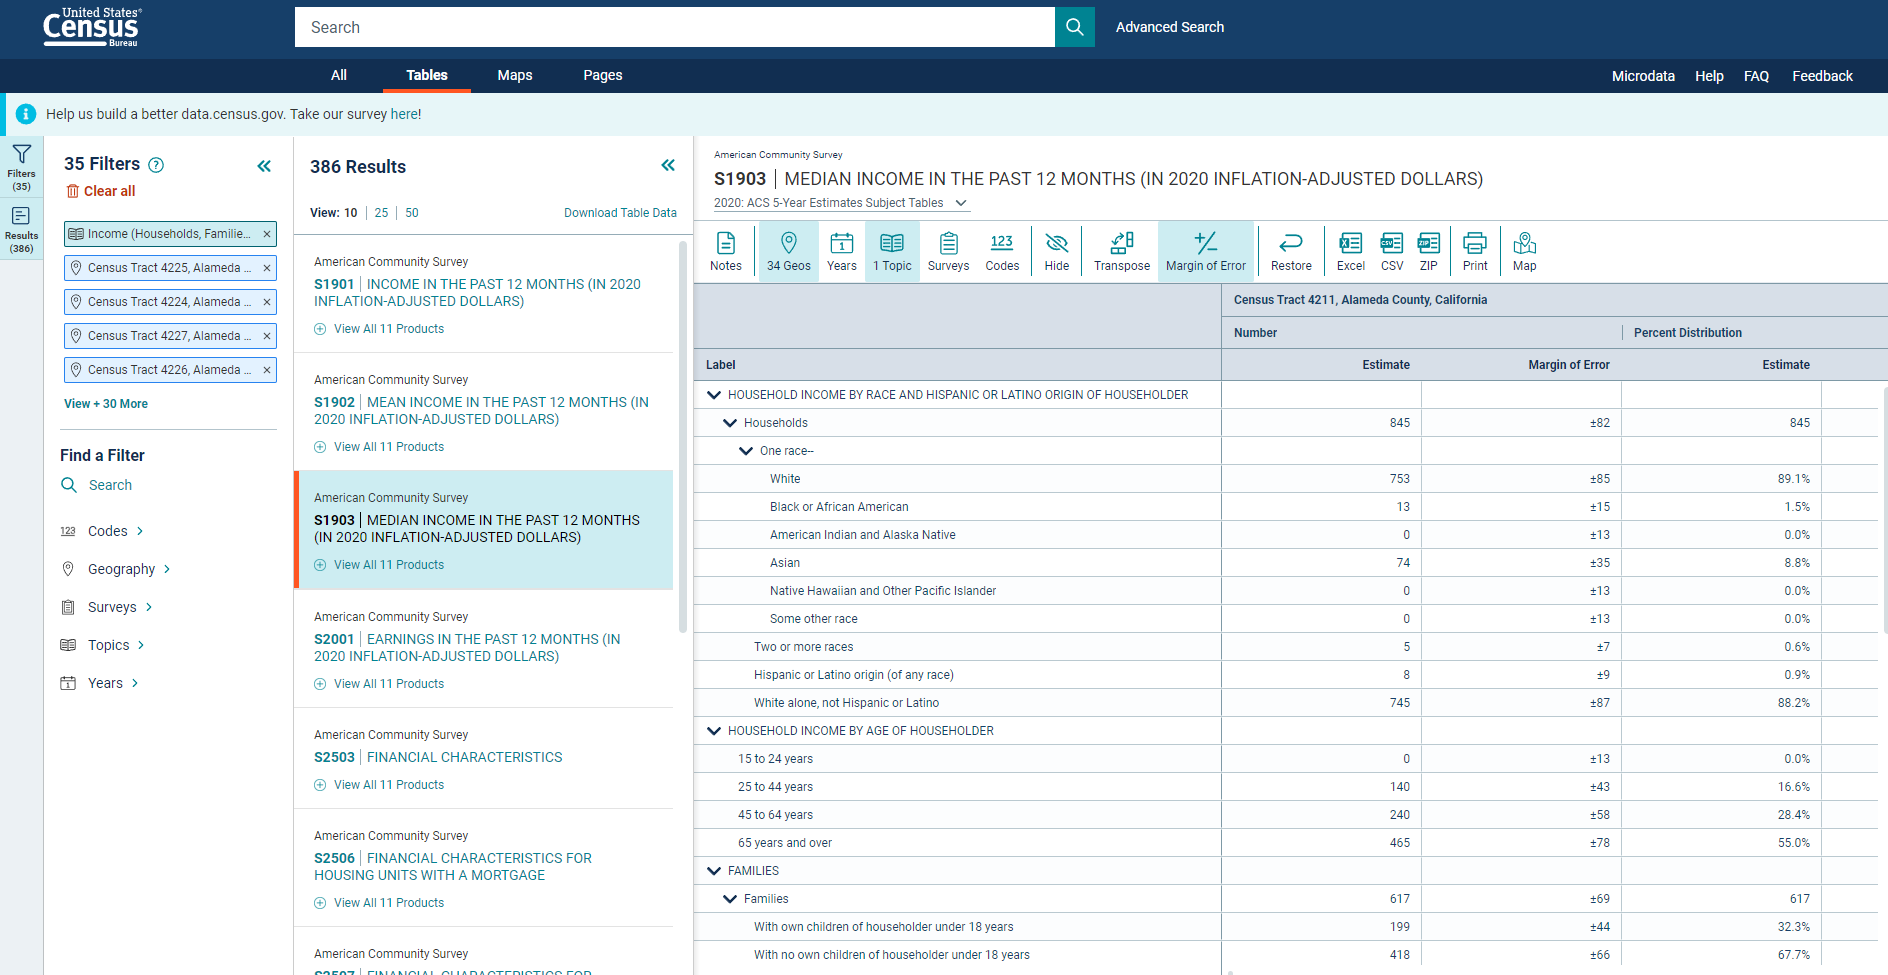

### Exploratory Data Analysis

Before the modelling phase of this project, a few different forms of exploratory analysis were performed to understand what kind of data we were looking at. We'll break down some of that here, as well as link to some of the results. 

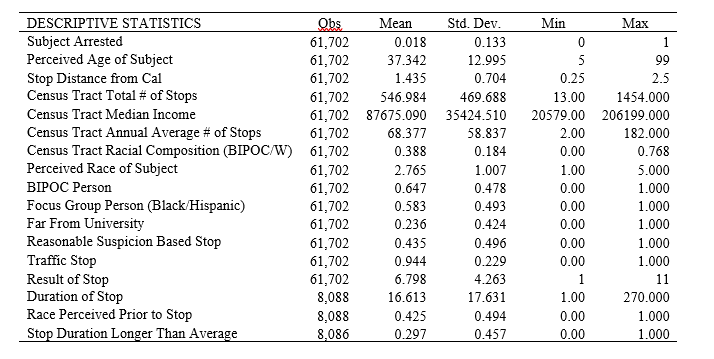

Although there were many different categories for race provided by the data (especially in the RIPA data when the feature became 'perceived race'), we narrowed them down to five categories. This was appropriate not only because the focus of our analysis was primarily on White vs Black or Hispanic stop/arrest rates, but also because the five selected categories already made up the majority of observations. It appeared that officers most of the time only put down one race. Observations that had many different perceived ethnicities were put in the 'mixed' category. 

To immediately examine if there were continuing disparities, we first looked at the percent of arrests in the dataset versus percent of residential population in berkeley for each race. Similar to the report, we found that Black subjects were a majority of those arrested despite being a substantially lower portion of the population of Berkeley. They were also arrested almost the same amount as White people, despite white people, despite white people making up over 60% of the residents in Berkeley. While this didn't prove anything yet, it was certainly an indicator that something was going on. 

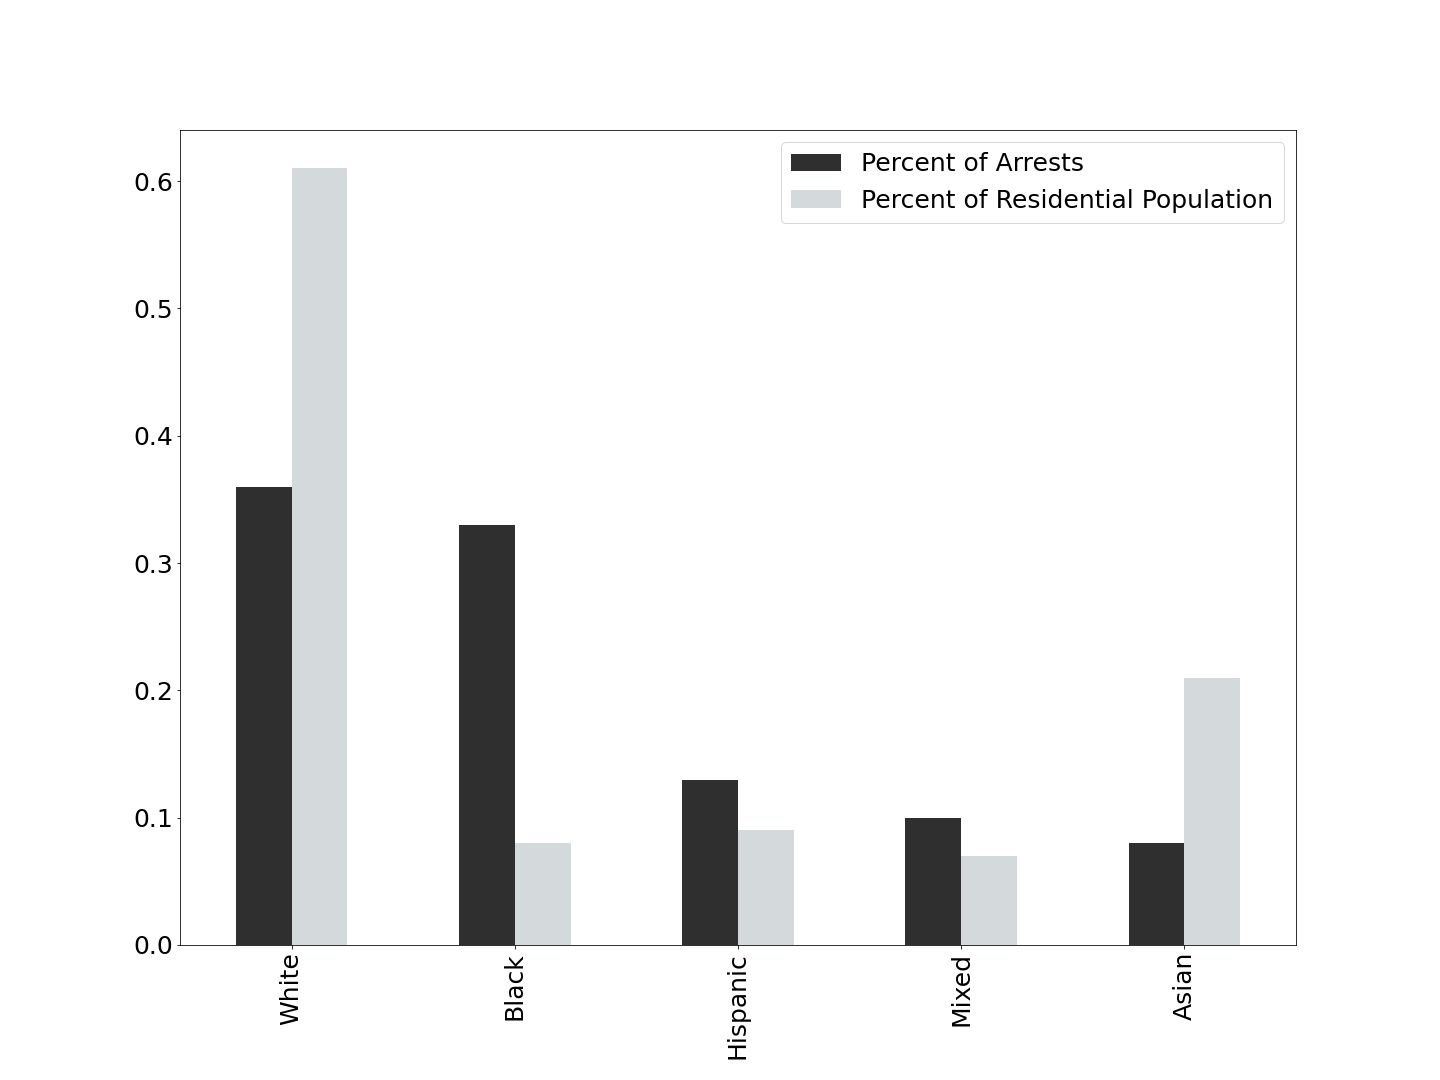

The next analyses looked at what kinds of stops we were observing. Stop type and result of stops were shared by both datasets, and were either labeled the same or not difficult to modify and join together. 

The majority of stops in this dataset were traffic stops, and most of the stops resulted in citations or other non-arrest scenarios. This also gave us a better idea of the data - while it didn't invalidate our models at all, it was important to contextualize the data and understand that our models would lean towards being more indicative of disparities in traffic stops than in pedestrian stops. This was also a reminder that there were only a few thousand arrests in the dataset, and that we were looking at stop rather than crime data. 

While there was initially concern that because there were so few arrests our models may not be accurate, we eventually concluded that this is not only the only data we have, but also still appropriate for a logistic regression, especially given that these are part of a much larger 5-year picture with many more observations.

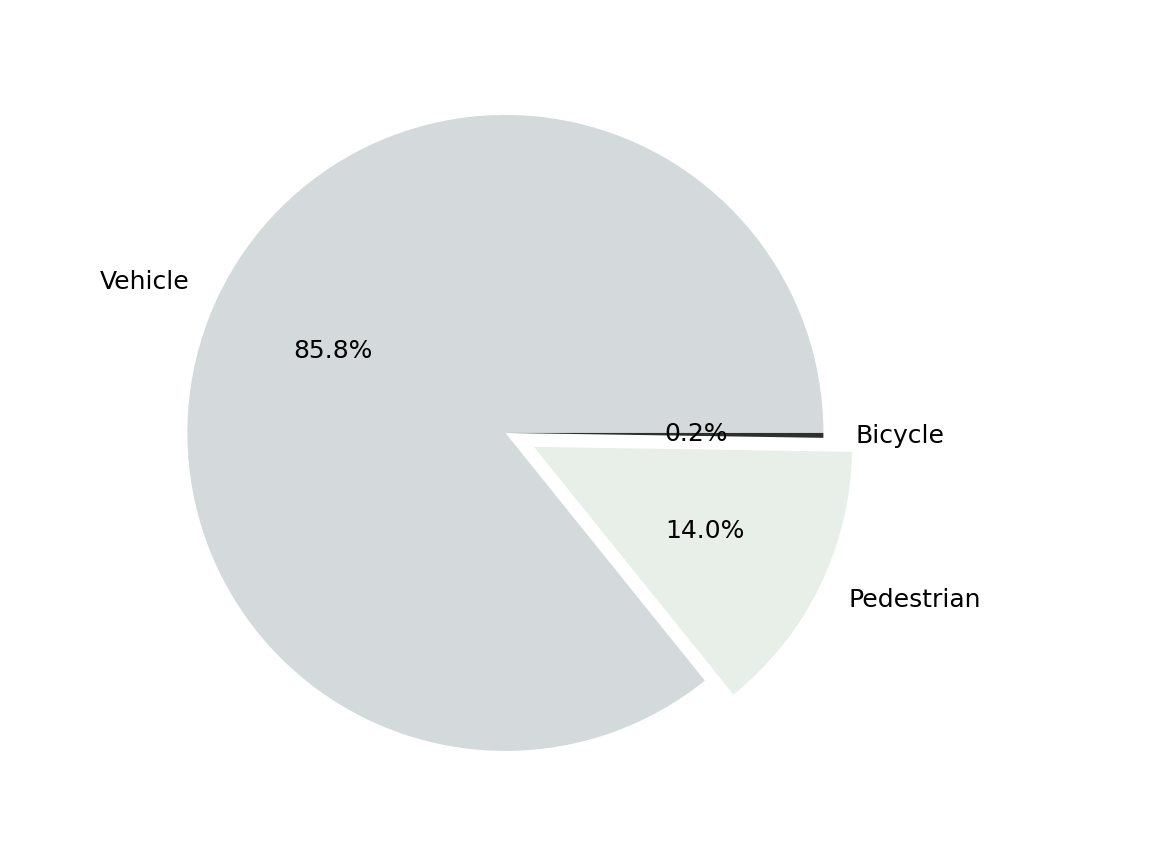

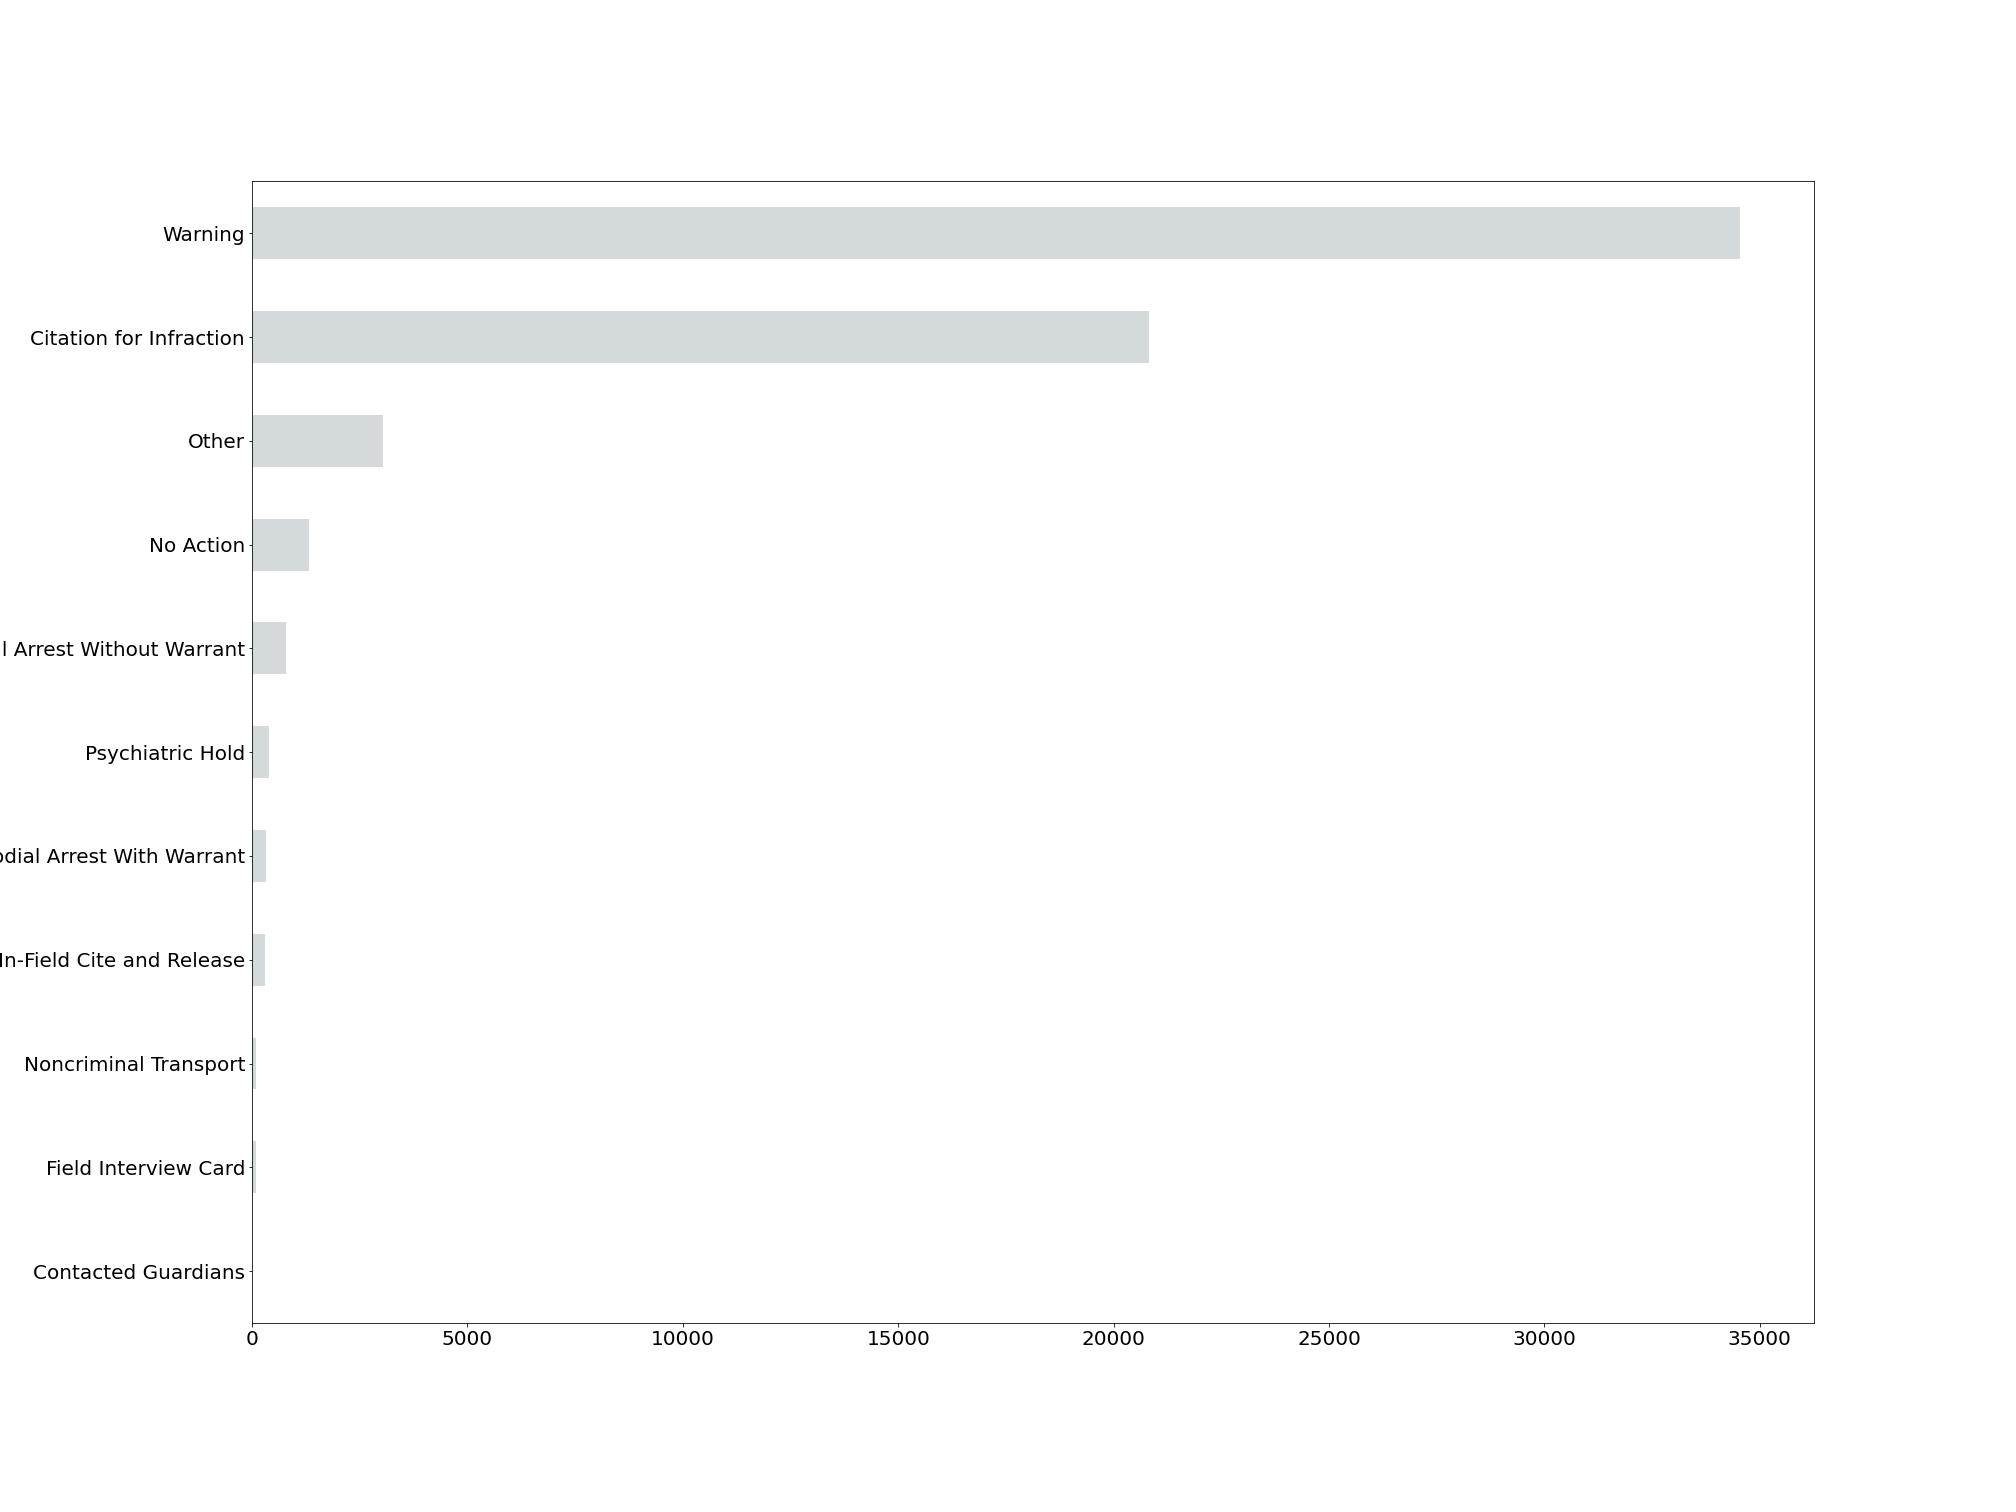

We also generated a variety of maps to view the stops throughout the city, and get an immediate idea of where the most crime happened. Part of the CPE report had mentioned distance from the university as a possible variable in use of force incidents, and while we later found little to no relationship, creating the maps still proved insightful. An interactive version of the most recent map is available [here](https://rawcdn.githack.com/kch0p/Berkeley-PD-ISF-110/5ea793c48f9f85894fbf09d56ba2aaee6c5bb8d2/Exports/Interactive%20Full%20Heatmap.html), and has boundaries, overlays, and variable information about each census tract.

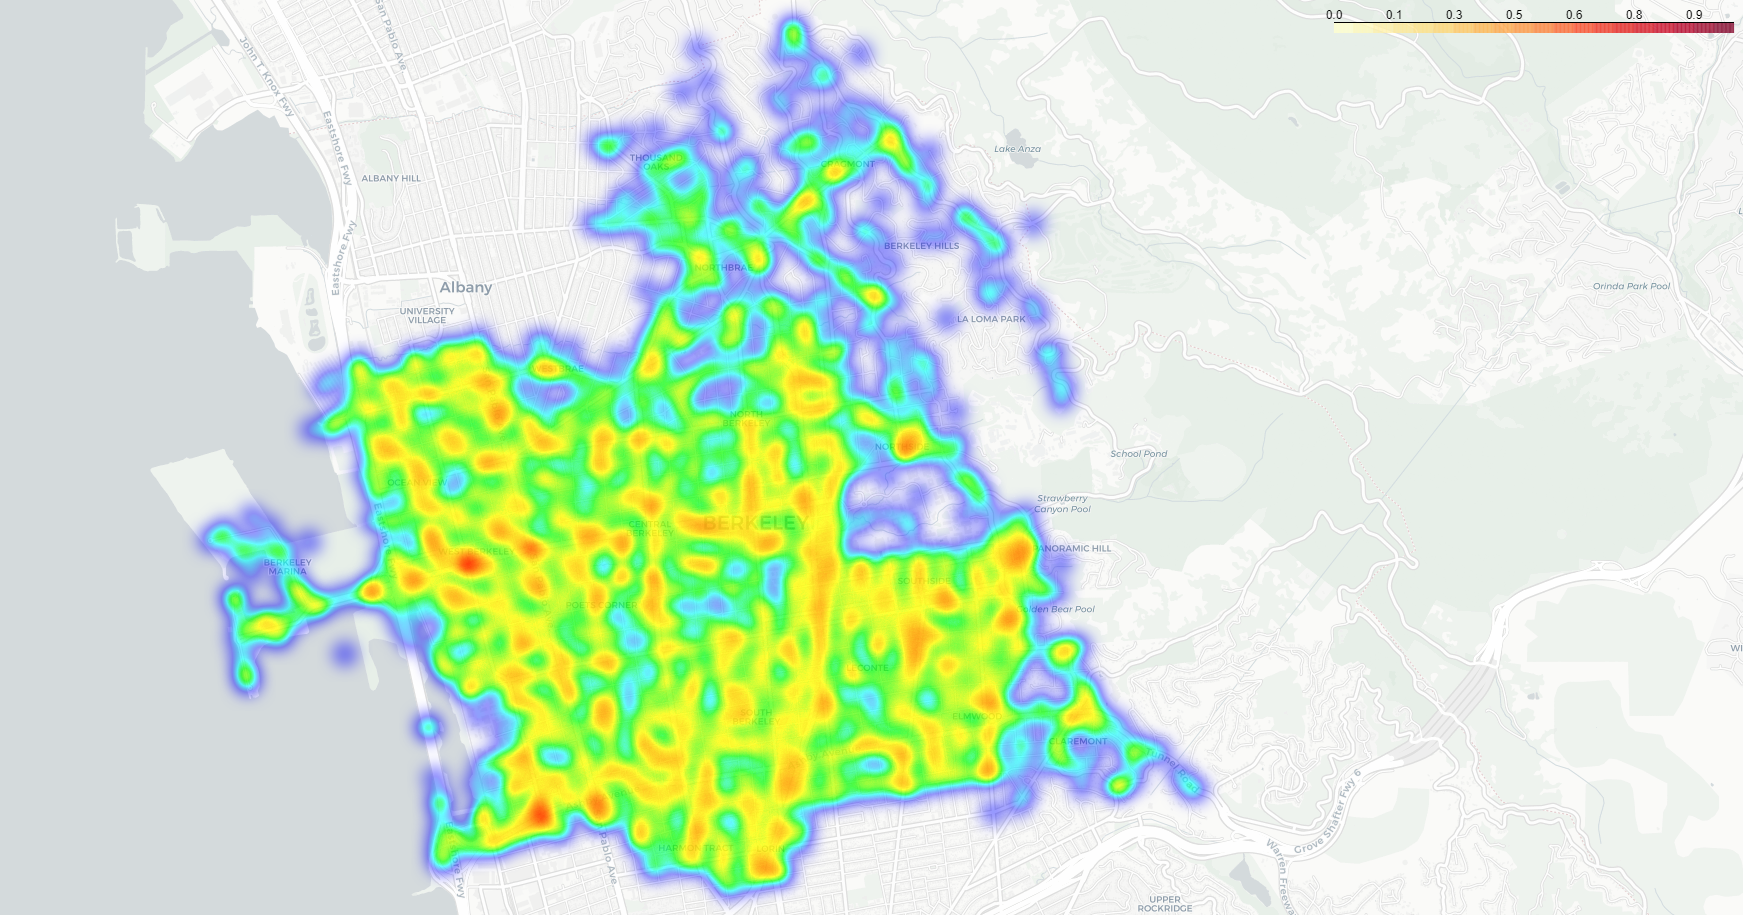

With our new knowledge that the majority of stops were traffic stops, it was easy to notice that this was reaffirmed by the maps. Upon closer inspection most of the the 'hottest' areas were along major streets like Shattuck or University, and otherwise seemed to clsuter immediately arround the university. But there was no clear relationship between being far from the university and having higher or lower stop rates, with a primary example being areas like the Marina or Northside and the Berkeley Hills. 




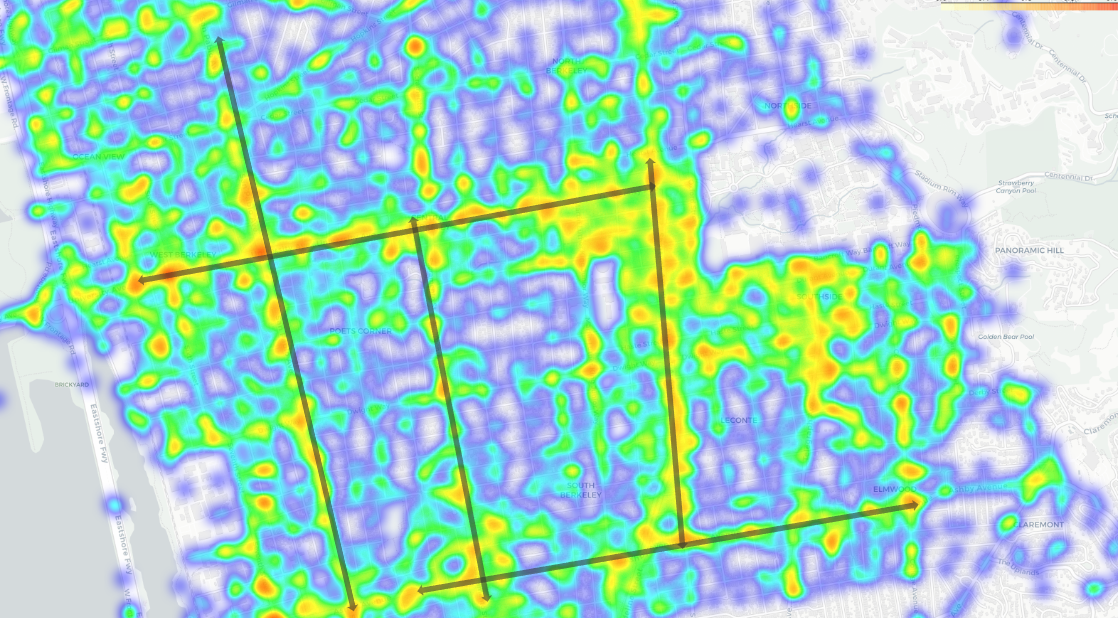

Finally, to get an idea of our another key dependant variable available within the RIPA-compliant data, we created a a boxplot for duration of stops. The results of this were mixed: while Black subject stop durations had clearly larger IQR (interquartile range) and standard deviations, these were not much larger than Hispanic or White values and the outlier spread looked largely the same. What was valuable however was seeing how Asian stop durations were much lower than all other race groups - this hinted towards a similar pattern we would see later in our analysis. 

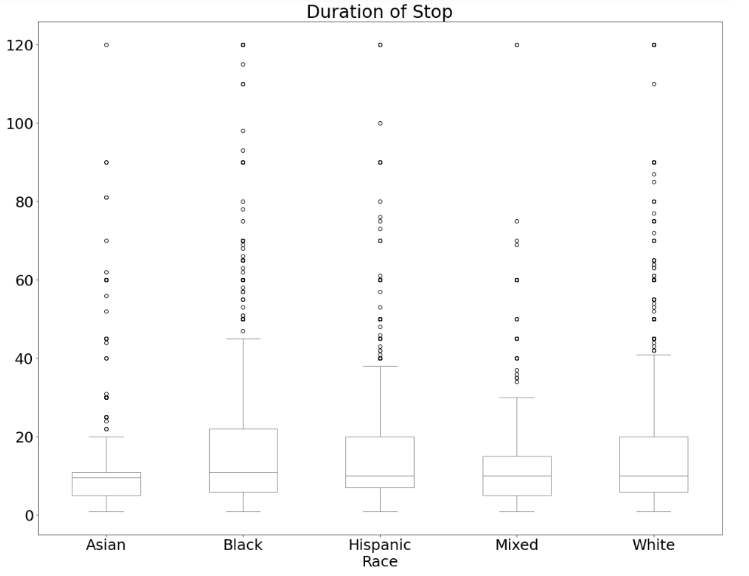

### Models

For this analysis we used multiple logistic regression to create and compare multi-stage models for White vs Black, Hispanic, and BIPOC stop scenarios and predict the odds of arrest or longer stops based on these variables. In the larger models (RIPA and Non-RIPA) less variables were used (this is explained more above). But in the smaller models where RIPA data provided more insight, we were also able to include the race perceived *prior* to stop variable, which ultimately proved to be significant.

#### RIPA and Non-RIPA Model Features: 
- Race (Categorical Option dependent on comparison)
- Perceived Age (Continuous Variable)
- Perceived Gender (Categorical Option 1, Male)
<br>
- Traffic Stop (Categorical Option 1, True)  
<br>

- Tract Distance from Cal (Continuous Variable)
- Tract Total Population (Continuous Variable)
- Tract Median Income (Continuous Variable)
- Tract Annual Average Stops (Continuous Variable)
- Tract BIPOC Composition (Continuous Variable)
<br>


#### RIPA Model Features: 
- Race (Categorical Option dependent on comparison)
- Perceived Age (Continuous Variable)
- Perceived Gender (Categorical Option 1, Male)
<br>
- Traffic Stop (Categorical Option 1, True)
- **Race perceived prior to stop (Categorical Option 1, True)**
<br>

- Tract Distance from Cal (Continuous Variable)
- Tract Total Population (Continuous Variable)
- Tract Median Income (Continuous Variable)
- Tract Annual Average Stops (Continuous Variable)
- Tract BIPOC Composition (Continuous Variable)

We essentially compared the same scenario but with different race subjects: a traffic stop (with different races depending on models) in any tract of the city. This not only revealed how race affected likelihood of arrest under similar conditions, but also revealed if there were significant effects from tract variables in the first place. Other features (there were approximaltely 35 other features provided in the RIPA data) were removed from the model either because they were not relevant or they were to difficult to merge/categorize. Additionally, models were tested against four races: 
- White
- Black
- Hispanic
- "Report Risk Groups"

Report Risk groups are a grouping of Black and Hispanic subjects made to broadly represent the two groups focused on the CPE report. We also tested for a BIPOC group in our analysis, but this risked affecting the results because of the major differences in duration and likelihood data for the Asian group. The output model summaries for the large models are printed below. If the results are not displaying properly, you can find all of the tables available [here](https://pastebin.com/Rx1eSVLf).

The larger model is used to broadly observe if race has a significant relationship with arrest, and if so, how the odds of arrest vary by race. Of course the argument could be made that race was recorded but the arrest occured for other reasons, but the broad analysis is still important to see the overall pattern suggested by the CPE report. The existance of the disparities here also lays the foundation for the more detailed racial comparisons made in the smaller models. 

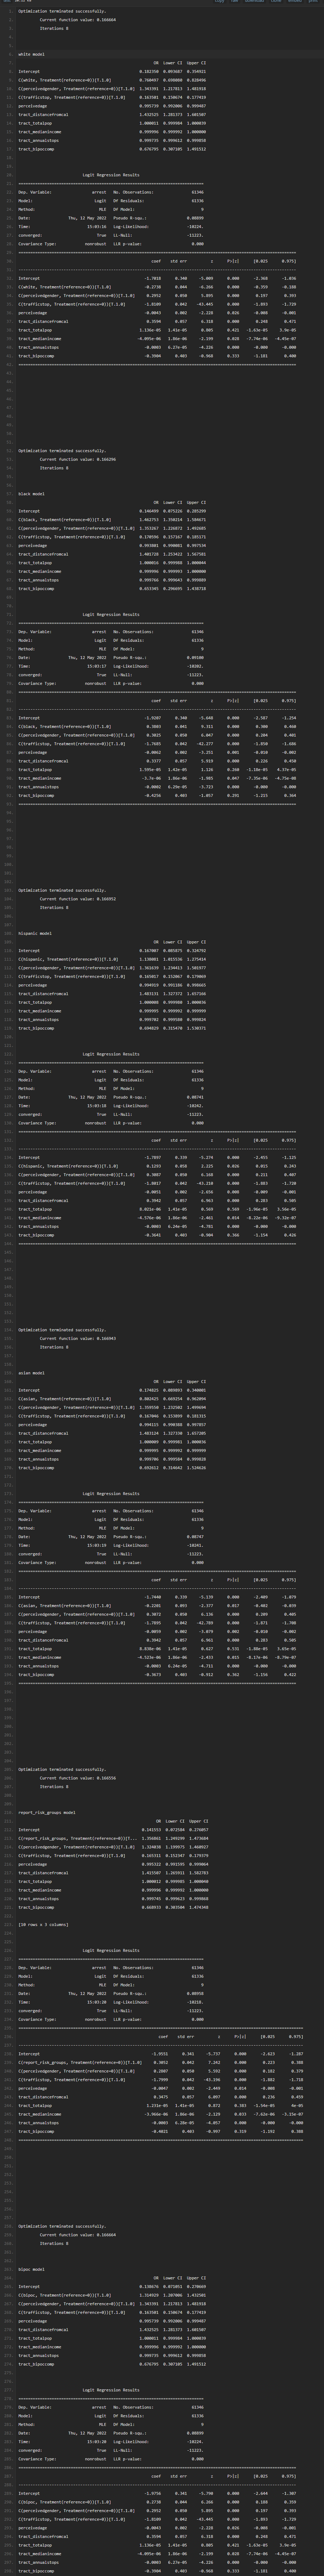

In the larger model, we found that all of the race categories had a significant or very significant relationship with arrest, and that white odds of arrest were lower than BIPOC categories odds. Being black had the highest odds increase in likelihood of arrest at approximately 1.46x, while being White lowered odds of arrest at .76x. In logistic regression models OR (Odds Ratio) values of <1 mean less likely and OR values of >1 mean more likely. In this case, the OR values just based on race already suggest that being Black substantially increases your odds of arrest, while being White substantially decreases them. The broader BIPOC variable also had an OR of 1.31x, indicating that just not being white increases odds of arrest. Asians are included in this category, however it's worth noting the Asian variable on it's own had a .80x OR, and as seen earlier had very different stop durations as well. The other racial variable, tract BIPOC composition, did not have a significant relationship with arrest in any of the other models, meanining it did not have a clear relationship with arrest and did not affect it. All other tract variables besides tract_distancefromcal were either insignificant, or did not cause large increases or decreases in odds of arrest. Ultimately the initial patterns here suggest that local variables largely don't matter, but race variables do. With the scale of results, these are valuable insights.

The smaller model was almost identical to the larger model above, but now included the perception of race variable provided by the RIPA-compliant data. It was a categorical variable, and in the scenario it was assumed that the race of the subject *had* been perceived prior to stop. The results of this are printed below, and also available for viewing [here](https://pastebin.com/TJbfhXnK).

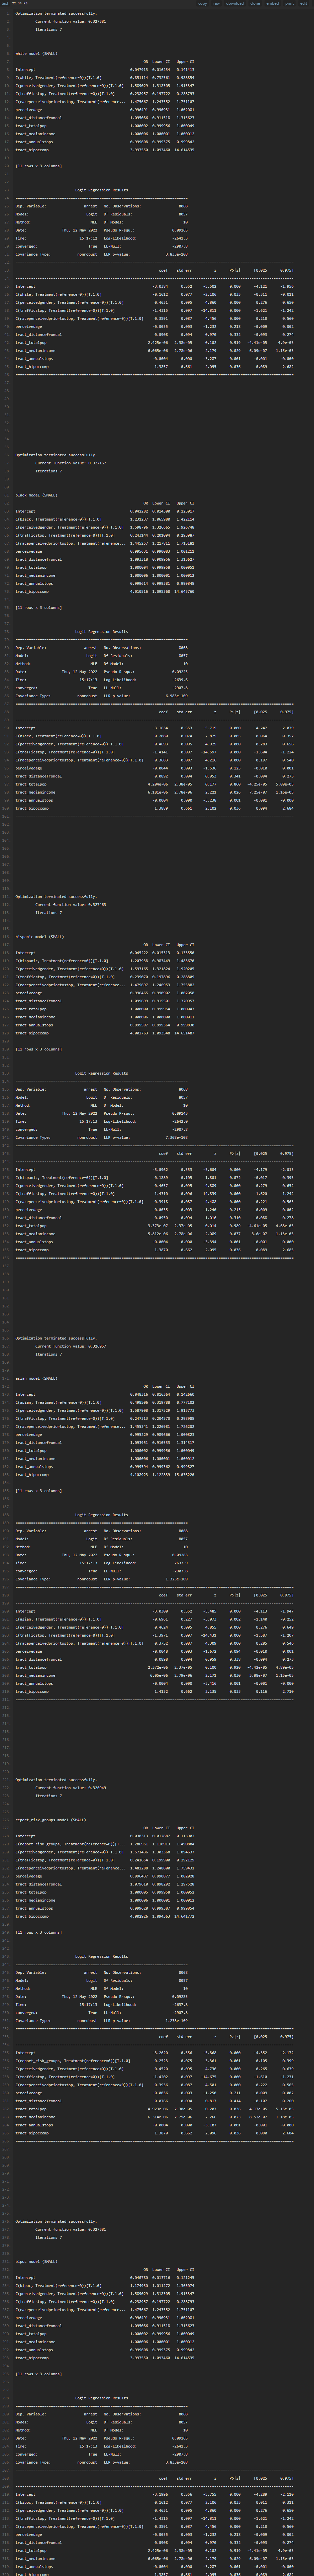

The smaller model echoed some of these patterns, as well as revealed just how important other just how important officer perception of race is. Under the condition that the officer had perceived the race of the subject prior to the stop, almost every race category except Hispanic had a significant or very significant relationship with arrest. Interestingly, the perception variable noticeably affected the ORs for previous high or low race categories: being White had a slightly higher OR or .85x, and being Black had a slightly lower OR of .12x, while being BIPOC lowered to 1.17x and being Asian drastically lowered to .49x. The perception variable itself was consistently very significant, and had a high OR increase that hovered at between 1.44x-1.48x. The biggest difference however was in the relevance of the local racial composition - the tract BIPOC composition variable was very significant in every model, and had the highest OR increase of any variable, remaining at approximately 4x in every scenario. The confidence interval for this variable was also extremely large compared to the previous larger models, with lower CIs as low as 1.09x and upper CIs as high as 15x. This could indicate a few things: the data for it could be innacurate somehow, or that the variable is both very important and very uncertain depending on the officer's perception. No matter what, it's importance changed when prior perception of race was included in the model, signalling again that racial factors do play a key role in decisions of arrest. 

Other tract variables were again either insignificant or did not have notable changes on the odds of arrest. 

Overall, there is a clear pattern between both datasets: that while local variables may not have much affect on the odds of arrest, race variables do increase the likelihood of arrest for BIPOC subjects and decrease them for White subjects. On top of this, if your race is perceived prior to the stop you are more likely to be arrested, and the officer is more likely to seriously weigh in how white the surrounding neighborhood is in deciding to arrest. While it might not be appropriate to say that this look into stops data necessary shows a form of causation, it is appropriate to say that race does play a role in arrests in Berkeley, and not in a good way. 

### Conclusion

Our multiple logistic regressions analysis showed that the broad racial disparities revealed in previous reports do still exist, and that new data on police perception of race was in fact necessary to further confirm this. Black and and other Risk Group subjects are more likely to be arrested on race alone, and especially if their race was perceived prior to the stop. 

The smaller models, although recent and containing fewer observations, echoed the findings of the larger models and additionally showed that if race *had* been perceived prior to a stop: 
- Subjects were substantially more likely to be arrested
- The racial composition of the surrounding area was much more likely to be considered
- The racial composition of the surrounding area, if more BIPOC than white, would increase odds of arrest

**Overall, this reveals that police in the city of Berkeley are not only arresting marginalized groups at disproportionate rates, but also more specifically that race *is* a factor when it comes to determining if someone should be arrested.**

Hopefully future policy changes in the city of Berkeley can prove to address some of these disparities. In late 2021, Berkeley City Council approved a [package of policy changes](https://www.berkeleyside.org/wp-content/uploads/2021/02/Motion-Item-1-Fair-and-Impartial-Policing.pdf) proposed by a city working grouped launched by the mayor in 2020 composed of city officials, police, and community stakeholder organizations. Key changes include that police would no [longer be able to conduct traffic stops for low-level traffic violations](https://www.berkeleyside.org/2021/02/24/berkeley-police-reform-traffic-stops-racial-disparities), and written consent would have to be obtained for a search to be conducted, suggesting that the city is trying to reduce not only the volume of discriminate stops/searches, but also make them safer when they do happen. More recent updates from the city include hints towards centralizing all transportation related work into one department and possibly including citizen volunteers ([BerkDOT]((https://www.berkeleyside.org/2022/05/06/berkeley-city-council-approves-police-reimagining-package))), spending approximately $200k on municipal code and staffing analyses, and creating a new “specialized care unit” (SCU) to handle behavioral health crisis response. Implementation will likely take at least 2-3 years, although a pilot program for the SCU may be launched by late 2022. An updated timeline of these events is available [here](https://www.berkeleyside.org/2021/05/25/berkeley-department-of-transportation-civilian-traffic-enforcement#:~:text=Berkeley%20police%20reform%20timeline).

It's our hope that the analysis done here both proved the points of the CPE before there were substantial changes in the data, and also set up a baseline of likelihoods within RIPA-compliant data to observe how policy changes in berkeley impact stop subjects in the future. It will be interesting to continue analysis of the data as Berkeley moves into a drastically different municipal space, and to see what the data looks like as we move out of COVID-19. 
